# Utils Function

Import neccessary modules and packages.

In [1]:
from urllib.request import urlretrieve
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.patheffects as PathEffects

we need to create `attention_data` folder where a downloaded image is saved to `img.jpg` file.

In [ ]:
%mkdir attention_data

We create `_preprocess()` function to download image from an internet url.

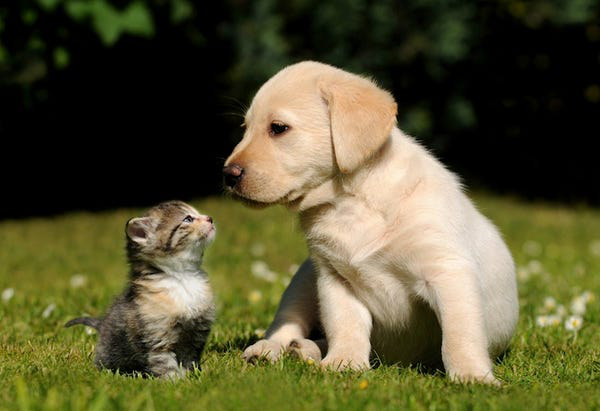

In [3]:
def _preprocess(url):
  urlretrieve(url, "attention_data/img.jpg")
  transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
  ])
  im = Image.open("attention_data/img.jpg")
  x = transform(im)
  return x, im

x, im = _preprocess(url = 'https://imgur.com/0pqitQt.png')
im

# Occlusion

## Occlusion Function

In [4]:
def _occlude(im, grid_size=14, id_patches = [], n_random_ocl = None):
  ''' This function create occlusion image based on input image. 
  we can create random occlusion if exist n_random_ocl.
  in other hand, return a salient or non-salient object based on the id patches of occlusion position.
  Args:
    im: -> PIL.Image; the input image
    grid_size: ->  dtype int; number of patches is seperated.
    id_patches: -> dtype list; a list of occlusion id patches. The ids are arranged from left to right and top to buttom within range [0, 195].
    n_random_ocl: -> dtype int or float; in case of integer dtype, it is number of patches is randomly selected to be occluded. If float, it is percentage of occluded patches.
  '''
  ids = np.arange(grid_size**2)
  im_cp = np.array(im)
  h, w = np.array(im).shape[:2]
  w_scale = w//grid_size
  h_scale = h//grid_size
  def _locate_xy(i):
    row_id = int(i//grid_size)
    col_id = i%grid_size
    row_star, row_end = int(row_id*h_scale), int((row_id+1)*h_scale)
    col_star, col_end = int(col_id*w_scale), int((col_id+1)*w_scale)
    return [row_star, row_end, col_star, col_end]
  if n_random_ocl:
    id_patches = np.arange(196)
    np.random.shuffle(id_patches)
    if isinstance(n_random_ocl, float):
      n_random_ocl = int(196*n_random_ocl)      
    id_patches = id_patches[:n_random_ocl]
  for i in id_patches:
    row_star, row_end, col_star, col_end = _locate_xy(i)
    im_cp[row_star:row_end, col_star:col_end, :] = 0
  return im_cp

## Random occlusion

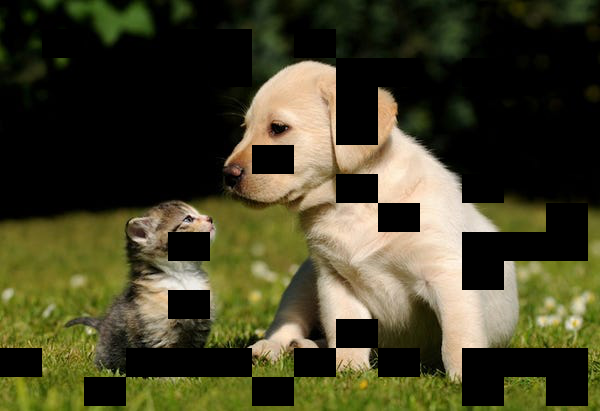

In [5]:
# Randomly occluded image with 20% patches
im_ra_oc = _occlude(im, n_random_ocl=0.2)
im_ra_oc = Image.fromarray(im_ra_oc)
im_ra_oc

## Salient occlusion

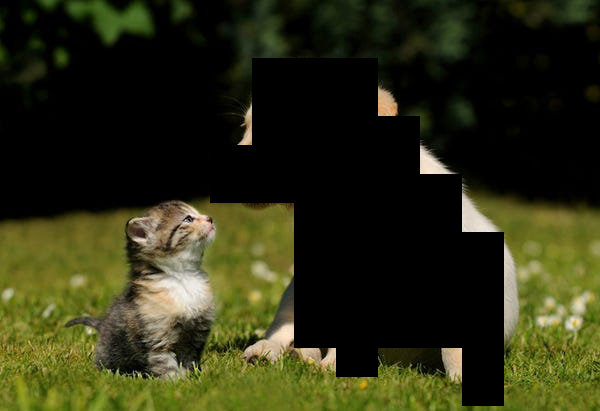

In [6]:
# Declare list id patches that include the main objects.
id_patches = [34, 35, 36, 48, 49, 50, 
             62, 63, 64, 65, 
             75, 76, 77, 78, 79, 89, 90,91, 92, 93, 94, 
             105, 106, 107, 108, 119, 120,121, 122, 123,
             133, 134, 135, 136, 137, 147, 148, 149, 150, 151, 
             161, 162, 163, 164, 165,
             176, 179, 193]

# Saliently occluded image
im_sa_oc = _occlude(im, id_patches = id_patches)
im_sa_oc = Image.fromarray(im_sa_oc)
im_sa_oc

## non-salient occlusion

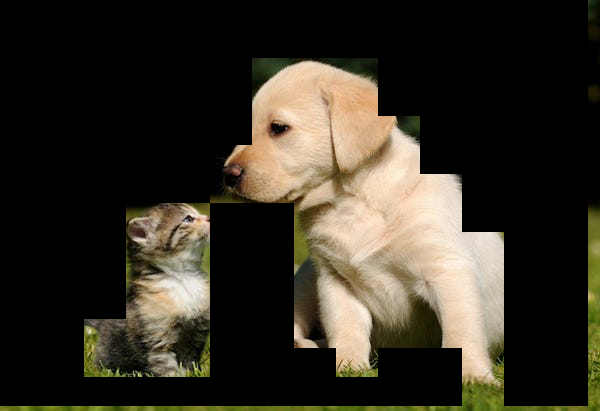

In [7]:
# Declare list id patches that does not include main objects
id_patches_dog = [34, 35, 36, 48, 49, 50, 
             62, 63, 64, 65, 
             75, 76, 77, 78, 79, 89, 90,91, 92, 93, 94, 
             105, 106, 107, 108, 119, 120,121, 122, 123,
             133, 134, 135, 136, 137, 147, 148, 149, 150, 151, 
             161, 162, 163, 164, 165,
             176, 179, 193]

id_patches_cat = [101, 102, 115, 116, 129, 130, 143, 144, 156, 157, 158, 170, 171, 172]
id_objs = id_patches_dog + id_patches_cat
id_patches_bg = [i for i in range(196) if i not in id_objs]

# Non saliently occluded image
im_non_sa_oc = _occlude(im, id_patches = id_patches_bg)
im_non_sa_oc = Image.fromarray(im_non_sa_oc)
im_non_sa_oc